#Taller Teoría de Señales - Redes Neuronaes Manual
# 19 de Abril de 2023

###*Integrantes:*
#####Daniel Steven Lozada - 1010148612
#####Federico Lopez - 1002576446
#####Santiago Erazo Mora - 1082658664

<ipython-input-1-7338be6a9464>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Test error: 0.3359203130478448


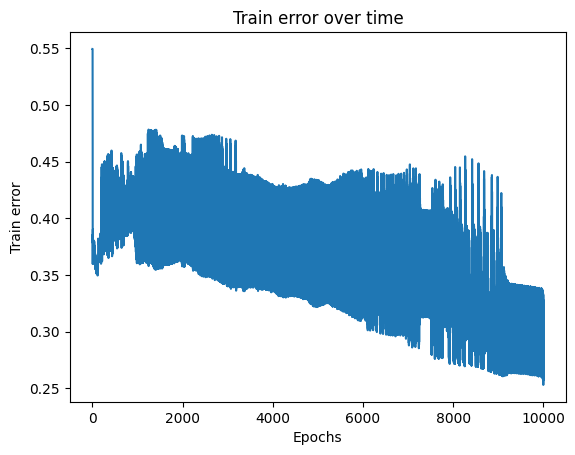

In [1]:
"""
      ---------------------------------------------------------------
Parameters
      ---------------------------------------------------------------
url -> Database hosting address
column_names -> Variables selected for measurement.
data -> Training data
X_train -> Training and testing variables
X_test -> Training and testing variables
Y_train -> Training and testing variables
Y_test -> Training and testing variables

Returns
      ---------------------------------------------------------------
test_error -> Returns the loss rate of the trained model.
output -> Input- Output relationship

"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Funciones de activación
def sigmoid(x, derivative=False):
    if derivative:
        return sigmoid(x) * (1 - sigmoid(x))
    else:
        return 1 / (1 + np.exp(-x))

def relu(x, derivative=False):
    if derivative:
        x[x<=0] = 0
        x[x>0] = 1
        return x
    else:
        return np.maximum(0,x)
    
def mse(y_true, y_pred, derivative=False):
    if derivative:
        return (y_pred-y_true)/y_true.shape[0]
    else:
        return np.mean((y_true-y_pred)**2)

# Función de entrenamiento manual
def train(X_data, Y_data, lr, params, training=True):
    # Forward
    params['A0'] = X_data
    params['Z1'] = np.matmul(params['A0'], params['W1']) + params['b1']
    params['A1'] = relu(params['Z1'])
    params['Z2'] = np.matmul(params['A1'], params['W2']) + params['b2']
    params['A2'] = relu(params['Z2'])
    params['Z3'] = np.matmul(params['A2'], params['W3']) + params['b3']
    params['A3'] = sigmoid(params['Z3'])

    output = params['A3']

    if training:
        # Backpropagation
        params['dZ3'] = mse(Y_data, output, True) * sigmoid(params['A3'], True)
        params['dW3'] = np.matmul(params['A2'].T, params['dZ3'])
        params['dZ2'] = np.matmul(params['dZ3'], params['W3'].T) * relu(params['A2'], True)
        params['dW2'] = np.matmul(params['A1'].T, params['dZ2'])
        params['dZ1'] = np.matmul(params['dZ2'], params['W2'].T) * relu(params['A1'], True)
        params['dW1'] = np.matmul(params['A0'].T, params['dZ1'])

        # Gradient Descent
        params['W3'] = params['W3'] - params['dW3'] * lr
        params['b3'] = params['b3'] - np.mean(params['dZ3'], axis=0, keepdims=True) * lr
        params['W2'] = params['W2'] - params['dW2'] * lr
        params['b2'] = params['b2'] - np.mean(params['dZ2'], axis=0, keepdims=True) * lr
        params['W1'] = params['W1'] - params['dW1'] * lr
        params['b1'] = params['b1'] - np.mean(params['dZ1'], axis=0, keepdims=True) * lr

    return output

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, names=column_names)

#Preprocesamiento de los datos
data = data.dropna()


# Reemplazar los signos '?' por NaN
data = data.replace('?', np.nan)
# Convertir a float y reemplazar NaN por la media de la columna
data = data.astype(float)
data = data.fillna(data.mean())



data = data.reset_index(drop=True)
data['target'][data['target']>0] = 1
X = data.drop('target', axis=1)
Y = data['target'].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#Inicialización de los parámetros de la red neuronal
input_size = X_train.shape[1]
hidden_size_1 = 32
hidden_size_2 = 16
output_size = 1
W1 = np.random.randn(input_size, hidden_size_1)
b1 = np.zeros((1, hidden_size_1))
W2 = np.random.randn(hidden_size_1, hidden_size_2)
b2 = np.zeros((1, hidden_size_2))
W3 = np.random.randn(hidden_size_2, output_size)
b3 = np.zeros((1, output_size))

params = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2, 'W3': W3, 'b3': b3}

#Entrenamiento de la red neuronal
epochs = 10000
learning_rate = 0.0001
train_errors = []
X_train_array = np.array(X_train.values, dtype=float)
output = train(X_train_array, Y_train, learning_rate, params, training=True)


for i in range(epochs):
  output = train(X_train.values, Y_train, learning_rate, params, training=True)
  train_error = mse(Y_train, output)
  train_errors.append(train_error)
if i % 1000 == 0:
  print("Epoch:", i, "Train error:", train_error)


X_test_array = np.array(X_test.values, dtype=float)
# Obtener las predicciones
predictions = train(X_test_array, Y_test, learning_rate, params, training=False)


#Evaluación de la red neuronal
output = train(X_test.values, Y_test, learning_rate, params, training=False)
test_error = mse(Y_test, output)
print("Test error:", test_error)

#Gráfico del error de entrenamiento
plt.plot(train_errors)
plt.title("Train error over time")
plt.xlabel("Epochs")
plt.ylabel("Train error")
plt.show()



In [ ]:
# Evaluación de la red neuronal con los nuevos datos de prueba
new_data = np.array([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]]) # Datos de prueba
output = train(new_data, np.array([]), learning_rate, params, training=False)
print("Output:", output)


Output: [[1.]]


In [ ]:
rounded_output = round(output[0][0])

print("Output:", rounded_output)

Output: 1
